In [1]:
import nltk; nltk.download('stopwords')

import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy
import textblob

# Plotting tools
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
c:\Users\prana\anaconda3\envs\tf-gpu\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [3]:
df= pd.read_csv(r"D:\Pranav_Files\Northwestern University\Classes\MSDS_498_Capstone_Project\Data and Git\Capstone_Project\data\Final_data\Final_data_model_no_stop_lement.csv")

In [4]:
df["class"].unique()

array(['suicide', 'casual-talk', 'depression', 'high-suicidal',
       'stressed'], dtype=object)

<AxesSubplot:>

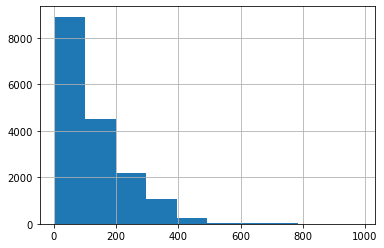

In [5]:
df["cleaned_text"].str.split().map(lambda x: len(x)).hist()

<AxesSubplot:>

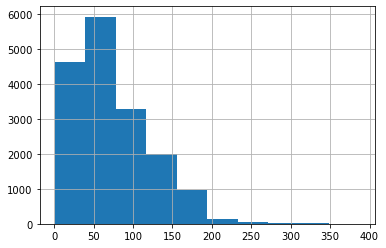

In [6]:
df["cleaned_text"].apply(lambda x: len(set(str(x).split()))).hist()

<AxesSubplot:>

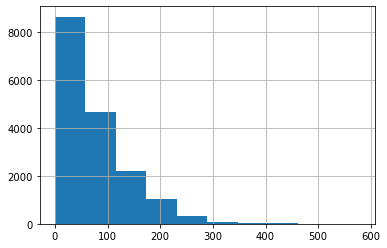

In [7]:
from wordcloud import STOPWORDS
### Other way to retrieve stopwords
# import nltk
# nltk.download(‘stopwords’)
# stopwords =set(stopwords.words(‘english’))
df["cleaned_text"].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS])).hist()

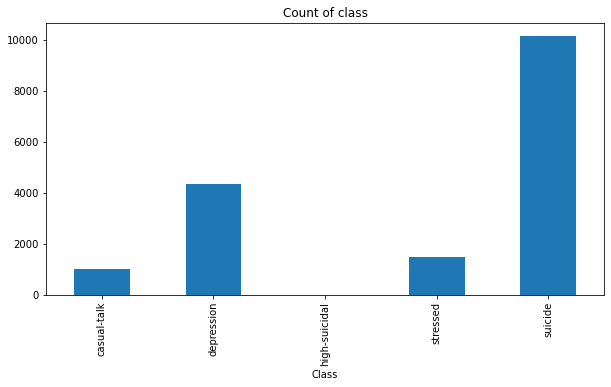

In [8]:
ax = df['class'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of class',
          figsize=(10, 5))
ax.set_xlabel('Class')
plt.show()

In [9]:
from sklearn.feature_extraction.text import CountVectorizer 

In [10]:
from textblob import TextBlob
df['polarity'] = df['cleaned_text'].apply(lambda x: TextBlob(x).polarity)
df['subjective'] = df['cleaned_text'].apply(lambda x: TextBlob(x).subjectivity)

In [11]:
def ngrams_top(corpus, ngram_range, n=None):
    ### What this function does: List the top n words in a vocabulary according to occurrence in a text corpus.
    vec = CountVectorizer(stop_words = "english", ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    total_list=words_freq[:n]
    df = pd.DataFrame(total_list, columns=["text","count"])
    return df

In [12]:
suicide=df[df["class"]=="suicide"]
casual_talk=df[df["class"]=="casual-talk"]
depression=df[df["class"]=="depression"]
high_suicidal=df[df["class"]=="high-suicidal"]
stressed=df[df["class"]=="stressed"]


# Analyzing Suicide Text**

In [13]:
suicide[["polarity",	"subjective"]]

,polarity,subjective
0,-0.167322,0.556667
1,-0.022826,0.452157
2,-0.150000,0.350000
3,-0.022222,0.288889
4,-0.125000,0.375000
...,...,...
10157,-0.186000,0.660000
10158,0.037912,0.487546
10159,-0.331250,0.793750
10160,-0.088889,0.612809


In [14]:
sum(suicide["polarity"])

-141.91576891314887

In [15]:
sum(depression["polarity"])

-6.261497115169375

In [16]:
uni_gram_num=40

In [17]:
unigram_df = ngrams_top(suicide["cleaned_text"], (1,1), n=uni_gram_num)
unigram_df[:20]


,text,count
0,just,13265
1,want,9431
2,like,7796
3,life,7116
4,know,6999
5,feel,6735
6,going,4350
7,people,4217
8,time,3865
9,really,3810


In [18]:
# fancier interactive plot using plotly express
import plotly.express as px
fig = px.bar(unigram_df, x='text', y='count', title="Counts of top unigrams", template='plotly_white', 
             labels={"ngram;: 'Unigram', 'count': 'Count'"})
                                                                                                                  
fig.show()

In [19]:
from wordcloud import WordCloud

In [20]:
text = " ".join(word for word in suicide["cleaned_text"])

In [21]:
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)

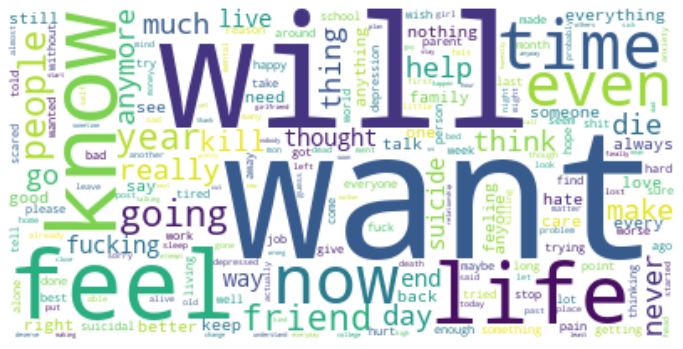

In [22]:
plt.figure(figsize=(12,12))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stoplist = stopwords.words('english')


c_vec = CountVectorizer(stop_words=stoplist, ngram_range=(2,3))


# matrix of ngrams
ngrams = c_vec.fit_transform(suicide['cleaned_text'])





# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram/trigram'})

In [24]:
df_ngram

,frequency,bigram/trigram
0,2556,feel like
1,1157,want die
2,595,get better
3,491,every day
4,448,suicidal thoughts
...,...,...
822520,1,abandon even
822521,1,abandon cat explain
822522,1,abandon cat
822523,1,abandon anyway prevent


In [25]:
df_ngram['polarity'] = df_ngram['bigram/trigram'].apply(lambda x: TextBlob(x).polarity)
df_ngram['subjective'] = df_ngram['bigram/trigram'].apply(lambda x: TextBlob(x).subjectivity)

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.pipeline import make_pipeline


tfidf_vectorizer = TfidfVectorizer(stop_words=stoplist, ngram_range=(2,3))
nmf = NMF(n_components=20)
pipe = make_pipeline(tfidf_vectorizer, nmf)



pipe.fit(suicide['cleaned_text'])




def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += ", ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
        print()
        print()
    print()


In [27]:
print_top_words(nmf, tfidf_vectorizer.get_feature_names(), n_top_words=3)

c:\Users\prana\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



Topic #0: feel like, like shit, feel like shit


Topic #1: someone talk, need someone, need someone talk


Topic #2: want die, die want, want die want


Topic #3: please help, help please, help please help


Topic #4: suicidal thoughts, every day, even know


Topic #5: talk someone, need talk, need talk someone


Topic #6: want kill, kill want, want kill want


Topic #7: want fucking, fucking die, want fucking die


Topic #8: want live, live anymore, want live anymore


Topic #9: really want, really want die, want die


Topic #10: commit suicide, way commit, way commit suicide


Topic #11: fuck fuck, fuck fuck fuck, die fuck fuck


Topic #12: get better, things get, things get better


Topic #13: need help, need help delete, help delete


Topic #14: going kill, think going, think going kill


Topic #15: want end, end life, end want


Topic #16: someone please, please talk, someone please talk


Topic #17: wish could, could go, wish could go


Topic #18: tired tired, tired tired tired, 

In [28]:
from sklearn.decomposition import LatentDirichletAllocation


tfidf_vectorizer = TfidfVectorizer(stop_words=stoplist, ngram_range=(2,3))
lda = LatentDirichletAllocation(n_components=20)
pipe = make_pipeline(tfidf_vectorizer, lda)


pipe.fit(suicide["cleaned_text"])



def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += ", ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
        print()
    print()

In [29]:
print_top_words(lda, tfidf_vectorizer.get_feature_names(), n_top_words=3)

Topic #0: feel like, want die, get better

Topic #1: feel like, want die, please help

Topic #2: want die, feel like, going kill

Topic #3: feel like, want die, get better

Topic #4: feel like, want die, suicidal thoughts

Topic #5: want die, feel like, want kill

Topic #6: feel like, want die, suicidal thoughts

Topic #7: feel like, want die, want kill

Topic #8: feel like, want die, get better

Topic #9: feel like, want die, need someone

Topic #10: feel like, want die, want fucking

Topic #11: feel like, want die, get better

Topic #12: feel like, want die, wish could

Topic #13: feel like, want die, want end

Topic #14: feel like, want die, really want

Topic #15: feel like, want die, really want

Topic #16: feel like, want die, please help

Topic #17: feel like, want die, fuck fuck

Topic #18: feel like, want die, please help

Topic #19: feel like, want die, want kill




# 

# Analyzing Depression Text**

In [30]:
unigram_df = ngrams_top(depression["cleaned_text"], (1,1), n=uni_gram_num)
unigram_df[:20]


,text,count
0,just,5058
1,like,4075
2,feel,3803
3,want,2780
4,know,2726
5,don,2648
6,life,2483
7,time,2146
8,people,1874
9,really,1728


In [31]:
# fancier interactive plot using plotly express
import plotly.express as px
fig = px.bar(unigram_df, x='text', y='count', title="Counts of top unigrams", 
             template='plotly_white', 
             labels={"ngram;: 'Unigram', 'count': 'Count'"})
                                                                                                                  
fig.show()

In [32]:
text = " ".join(word for word in depression["cleaned_text"])
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)

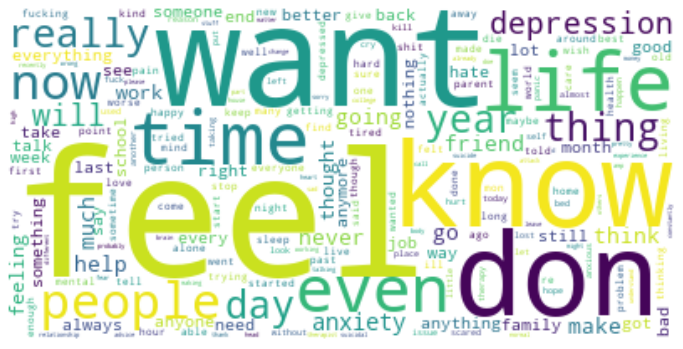

In [33]:
plt.figure(figsize=(12,12))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stoplist = stopwords.words('english')


c_vec = CountVectorizer(stop_words=stoplist, ngram_range=(2,3))


# matrix of ngrams
ngrams = c_vec.fit_transform(depression['cleaned_text'])





# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram/trigram'})

In [35]:
df_ngram

,frequency,bigram/trigram
0,1462,feel like
1,261,mental health
2,230,wo nt
3,206,panic attack
4,206,every day
...,...,...
398272,1,aachen wider
398273,1,aachen pollen enface
398274,1,aachen pollen
398275,1,aachen air entice


In [36]:
df_ngram['polarity'] = df_ngram['bigram/trigram'].apply(lambda x: TextBlob(x).polarity)
df_ngram['subjective'] = df_ngram['bigram/trigram'].apply(lambda x: TextBlob(x).subjectivity)

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.pipeline import make_pipeline


tfidf_vectorizer = TfidfVectorizer(stop_words=stoplist, ngram_range=(2,3))
nmf = NMF(n_components=20)
pipe = make_pipeline(tfidf_vectorizer, nmf)



pipe.fit(depression['cleaned_text'])




def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += ", ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
        print()
        print()
    print()


c:\Users\prana\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\decomposition\_nmf.py:1692: ConvergenceWarning:

Maximum number of iterations 200 reached. Increase it to improve convergence.



In [38]:
print_top_words(nmf, tfidf_vectorizer.get_feature_names(), n_top_words=3)

c:\Users\prana\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



Topic #0: people suffering mental, appointment help, among dozen clinically


Topic #1: thelma herbs, trauma anxiety depression, trauma anxiety


Topic #2: ween help, thee ween help, thee ween


Topic #3: feel like, anyone else, every day


Topic #4: help co, depression help co, depression help


Topic #5: like live, movie youtube, college girlfriend


Topic #6: depression anxiety, thee ween, thelma herbs


Topic #7: mental health, mental health depression, health depression


Topic #8: want die, die want, want die want


Topic #9: make feel, feel better, make feel better


Topic #10: suicidal thought, last year, suicidal thought back


Topic #11: feel extremely, something bad, depression anxiety


Topic #12: would know brain, brain bleed, like month ago


Topic #13: go away, wanna happy, like go away


Topic #14: back depression, spiral back, spiral back depression


Topic #15: word depression, depression pakistani, lost wall broken


Topic #16: need someone, need someone talk, someon

In [39]:
from sklearn.decomposition import LatentDirichletAllocation


tfidf_vectorizer = TfidfVectorizer(stop_words=stoplist, ngram_range=(2,3))
lda = LatentDirichletAllocation(n_components=20)
pipe = make_pipeline(tfidf_vectorizer, lda)


pipe.fit(depression["cleaned_text"])



def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += ", ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
        print()
    print()

In [40]:
print_top_words(lda, tfidf_vectorizer.get_feature_names(), n_top_words=3)

Topic #0: feel like, get better, get depression

Topic #1: feel like, help co, eyed gel bonsai

Topic #2: feel like, help co, want die

Topic #3: feel like, help co, want die

Topic #4: feel like, depression anxiety, help depression anxiety

Topic #5: feel like, mental health, help co

Topic #6: feel like, common like, also turkish

Topic #7: feel like, anyone else, mental health

Topic #8: feel like, depression anxiety, mental health

Topic #9: feel like, mental health, even though

Topic #10: feel like, help co, anyone else

Topic #11: feel like, help co, every time

Topic #12: feel like, anxiety loss, depression anxiety loss

Topic #13: feel like, help co, every day

Topic #14: feel like, thee ween, thelma herbs

Topic #15: feel like, long time, seems like

Topic #16: feel like, try try, gon na

Topic #17: feel like, help co, gon na

Topic #18: thelma herbs, help co, pain losing

Topic #19: feel like, herbs thelma herbs, thelma herbs thelma




 # 
 # Analyzing Casual Text

In [41]:
sum(casual_talk["polarity"])

53.662907178627464

In [42]:
unigram_df = ngrams_top(casual_talk["cleaned_text"], (1,1), n=uni_gram_num)
unigram_df[:20]


,text,count
0,just,450
1,like,389
2,want,254
3,know,234
4,filler,207
5,people,176
6,time,147
7,really,135
8,did,134
9,going,132


In [43]:
# fancier interactive plot using plotly express
import plotly.express as px
fig = px.bar(unigram_df, x='text', y='count', title="Counts of top unigrams", 
             template='plotly_white', 
             labels={"ngram;: 'Unigram', 'count': 'Count'"})
                                                                                                                  
fig.show()

In [44]:
text = " ".join(word for word in casual_talk["cleaned_text"])
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)

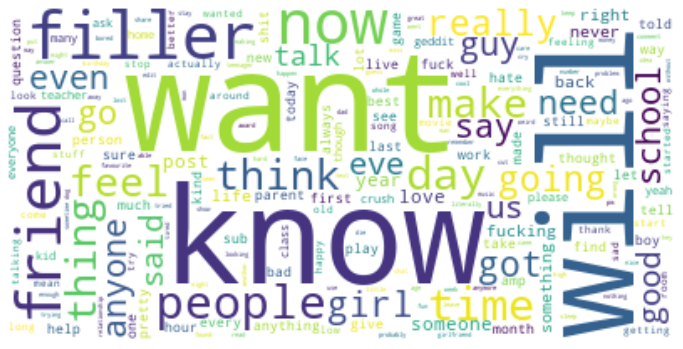

In [45]:
plt.figure(figsize=(12,12))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stoplist = stopwords.words('english')


c_vec = CountVectorizer(stop_words=stoplist, ngram_range=(2,3))


# matrix of ngrams
ngrams = c_vec.fit_transform(casual_talk['cleaned_text'])





# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram/trigram'})

In [47]:
df_ngram

,frequency,bigram/trigram
0,188,filler filler
1,172,filler filler filler
2,96,eve eve
3,95,eve eve eve
4,43,amp amp
...,...,...
44583,1,abandoned short
44584,1,abandon toxic nature
44585,1,abandon toxic
44586,1,aah could sleep


In [48]:
df_ngram['polarity'] = df_ngram['bigram/trigram'].apply(lambda x: TextBlob(x).polarity)
df_ngram['subjective'] = df_ngram['bigram/trigram'].apply(lambda x: TextBlob(x).subjectivity)

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.pipeline import make_pipeline


tfidf_vectorizer = TfidfVectorizer(stop_words=stoplist, ngram_range=(2,3))
nmf = NMF(n_components=20)
pipe = make_pipeline(tfidf_vectorizer, nmf)



pipe.fit(casual_talk['cleaned_text'])




def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += ", ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
        print()
        print()
    print()


c:\Users\prana\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\decomposition\_nmf.py:1692: ConvergenceWarning:

Maximum number of iterations 200 reached. Increase it to improve convergence.



In [50]:
print_top_words(nmf, tfidf_vectorizer.get_feature_names(), n_top_words=3)

Topic #0: filler filler, filler filler filler, ruby filler


Topic #1: amp amp, amp amp amp, numbers knowledge


Topic #2: want talk, anyone want talk, anyone want


Topic #3: first girlfriend, girlfriend turned moon, girlfriend turned


Topic #4: get laid, day posting non, fact get


Topic #5: among us, play among us, play among


Topic #6: free award, got free award, got free


Topic #7: anyone want, want chat, anyone want chat


Topic #8: mega thick, dear mega thick, dear mega


Topic #9: feel like, ever feel, ever feel like


Topic #10: sub edit, teenagers sub edit, teenagers sub


Topic #11: want die, anti tax want, tax want


Topic #12: last post, thanks answering, saw last post


Topic #13: people play, looking people, looking people play


Topic #14: would love, even though, really like


Topic #15: anyone else, else get, anyone else get


Topic #16: post weekend, text post weekend, text post


Topic #17: fem boy, favourite variant, fem boy fem


Topic #18: going die, going die

c:\Users\prana\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [51]:
from sklearn.decomposition import LatentDirichletAllocation


tfidf_vectorizer = TfidfVectorizer(stop_words=stoplist, ngram_range=(2,3))
lda = LatentDirichletAllocation(n_components=20)
pipe = make_pipeline(tfidf_vectorizer, lda)


pipe.fit(casual_talk["cleaned_text"])



def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += ", ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
        print()
    print()

In [52]:
print_top_words(lda, tfidf_vectorizer.get_feature_names(), n_top_words=3)

Topic #0: end things boyfriend, things boyfriend, end things

Topic #1: filler filler, filler filler filler, huh huh

Topic #2: view risk, utmost importance, stop scrolling appreciate

Topic #3: eve eve, eve eve eve, countable infinity

Topic #4: anyone want, eating pizza wants, pizza wants

Topic #5: talk bored, tow imposter, tow imposter us

Topic #6: today fine, looks amp, super mario

Topic #7: amp amp, amp amp amp, alone fuck

Topic #8: filer filer, filer filer filer, lived standards

Topic #9: amp amp amp, amp amp, thanks answering

Topic #10: recess football, miss recess football, miss recess

Topic #11: insecure sec, insecure insecure, insecure insecure sec

Topic #12: alien abducts, go sub, sub sad

Topic #13: ignore video, ignore video listen, video listen

Topic #14: anyone else, anti tax want, tax want

Topic #15: ask crush, turned moon, first girlfriend

Topic #16: text text, text text text, bored challenge

Topic #17: read title, simply nothing, please check

Topic #18: f

# 
# Analyzing Stressed Text**

In [53]:
sum(stressed["polarity"])

-29.422430825782804

In [54]:
unigram_df = ngrams_top(stressed["cleaned_text"], (1,1), n=uni_gram_num)
unigram_df[:20]


,text,count
0,just,823
1,like,758
2,feel,576
3,know,565
4,time,424
5,really,373
6,did,361
7,want,346
8,anxiety,314
9,help,306


In [55]:
# fancier interactive plot using plotly express
import plotly.express as px
fig = px.bar(unigram_df, x='text', y='count', title="Counts of top unigrams", 
             template='plotly_white', 
             labels={"ngram;: 'Unigram', 'count': 'Count'"})
                                                                                                                  
fig.show()

In [56]:
text = " ".join(word for word in stressed["cleaned_text"])
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)

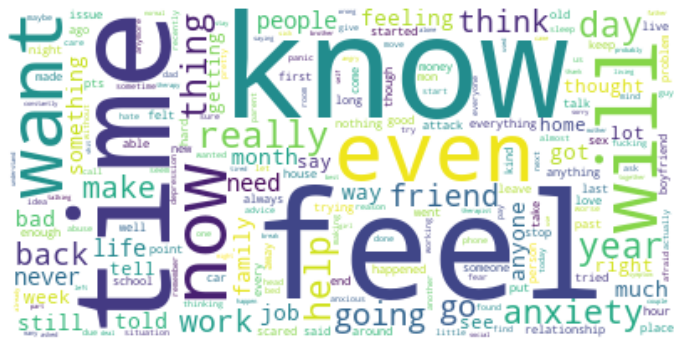

In [57]:
plt.figure(figsize=(12,12))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [58]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stoplist = stopwords.words('english')


c_vec = CountVectorizer(stop_words=stoplist, ngram_range=(2,3))


# matrix of ngrams
ngrams = c_vec.fit_transform(stressed['cleaned_text'])





# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram/trigram'})

In [59]:
df_ngram

,frequency,bigram/trigram
0,228,feel like
1,44,even though
2,43,anyone else
3,41,panic attacks
4,36,panic attack
...,...,...
99480,1,abandoning home
99481,1,abandoning even though
99482,1,abandoning even
99483,1,abandoned yet never


In [60]:
df_ngram['polarity'] = df_ngram['bigram/trigram'].apply(lambda x: TextBlob(x).polarity)
df_ngram['subjective'] = df_ngram['bigram/trigram'].apply(lambda x: TextBlob(x).subjectivity)

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.pipeline import make_pipeline


tfidf_vectorizer = TfidfVectorizer(stop_words=stoplist, ngram_range=(2,3))
nmf = NMF(n_components=20)
pipe = make_pipeline(tfidf_vectorizer, nmf)



pipe.fit(stressed['cleaned_text'])




def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += ", ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
        print()
        print()
    print()


c:\Users\prana\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\decomposition\_nmf.py:1692: ConvergenceWarning:

Maximum number of iterations 200 reached. Increase it to improve convergence.



In [62]:
print_top_words(nmf, tfidf_vectorizer.get_feature_names(), n_top_words=3)

c:\Users\prana\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



Topic #0: need advice help, like yrs, like yrs old


Topic #1: soon possible, room please room, room rent


Topic #2: taking programming jobs, job bed private, private bathroom


Topic #3: home full, needed place, life really


Topic #4: feel like, know feel, know feel like


Topic #5: unsure currently, back house court, would allowed back


Topic #6: panic attack often, husband recently banned, unless absolutely necessary


Topic #7: anxiety depression anything, end contemplate, state hours end


Topic #8: times weight thinks, beautiful every, negative sometimes


Topic #9: social services, mentally ill, obviously mentally ill


Topic #10: many ways, feel awful, like shit writing


Topic #11: bunch dumped, love old got, feeling worthless


Topic #12: kid mon, chest til, would want compare


Topic #13: anticipatory anxiety, anxiety let, tickets next


Topic #14: today really bad, today really, go back


Topic #15: art school, panic attacks, right responses


Topic #16: need help, help 

In [63]:
from sklearn.decomposition import LatentDirichletAllocation


tfidf_vectorizer = TfidfVectorizer(stop_words=stoplist, ngram_range=(2,3))
lda = LatentDirichletAllocation(n_components=20)
pipe = make_pipeline(tfidf_vectorizer, lda)


pipe.fit(stressed["cleaned_text"])



def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += ", ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
        print()
    print()

In [64]:
print_top_words(lda, tfidf_vectorizer.get_feature_names(), n_top_words=3)

Topic #0: hard house, house school, know know want

Topic #1: feel like, know feel like, get job

Topic #2: feel like, bump bump, wall stopping

Topic #3: feel like, good enough, go back

Topic #4: feel like, feeling super, need help

Topic #5: feel like, seems getting, seems getting worse

Topic #6: anyone else, need help, feels like

Topic #7: feel like, panic attacks, really mad

Topic #8: soon possible, feel like, heart rate

Topic #9: really want, depression anxiety, need help

Topic #10: feel like, even though, wanted get

Topic #11: feel like, sleep sleep, could get

Topic #12: feel like, go doctor, get anxious

Topic #13: feel like, know trust, always feel

Topic #14: feel like, even though, would rather

Topic #15: feel like, even know, anyone else

Topic #16: feel like, panic attack, year old

Topic #17: feel like, anything like, panic attack

Topic #18: feel like, fucking cops, phone number

Topic #19: months ago, wage job, minimum wage job


